In [1]:
import os
import numpy as np
from sklearn.decomposition import PCA
import random
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../src/')
from config import raw_data_path, univariate_data_path, processed_data_path
from scipy.signal import resample


In [2]:
dataset = 'target'

In [3]:
import os
import numpy as np
from sklearn.decomposition import PCA

def univariate(dataset_name):
    data_dir = os.path.join(processed_data_path, dataset_name + "_preprocessed.npy")
    data = np.load(data_dir, allow_pickle=True)

    # Define the path to save the new dataset
    

    # Initialize a list for storing modified entries
    univariate_data = []
    retained_variances = []  # List to store retained variance for each entry

    for entry in data:
        # Copy the entry to preserve metadata
        new_entry = entry.copy()

        # Extract the signal matrix (shape: (599999, 6))
        signal_matrix = entry['signal']
        
        # Apply PCA to reduce from 6D to 1D
        pca = PCA(n_components=1)
        reduced_signal = pca.fit_transform(signal_matrix)  # Shape: (599999, 1)
        
        # Calculate retained variance
        retained_variance = np.sum(pca.explained_variance_ratio_)
        retained_variances.append(retained_variance)

        print(f"Retained Variance for {entry['record_name']}: {retained_variance:.6f}")
        
        # Flatten to (599999,) to retain time-series format
        new_entry['signal'] = reduced_signal.flatten()

        # Append modified entry to the new dataset
        univariate_data.append(new_entry)

    # Compute the average retained variance for the dataset
    avg_retained_variance = np.mean(retained_variances)
    print(f"\nAverage Retained Variance for {dataset_name}: {avg_retained_variance:.6f}")

    # Convert to a NumPy array and save
    
    return univariate_data

univariate_data = univariate(dataset)


Retained Variance for Hopper-2023_05_25_12_03_38-0000010090-0003: 0.464794
Retained Variance for Hopper-2023_01_24_20_15_17-0000010181-0001: 0.658877
Retained Variance for Hopper-2022_02_11_12_58_15-0000010090-0001: 0.503980
Retained Variance for Hopper-2022_05_20_07_00_31-0000010181-0006: 0.567743
Retained Variance for Hopper-2022_12_02_14_40_24-0000010090-0004: 0.449304
Retained Variance for Hopper-2023_03_28_18_43_15-0000010181-0002: 0.533632
Retained Variance for Hopper-2022_11_08_14_12_32-0000010090-0006: 0.484500
Retained Variance for Hopper-2023_12_15_18_44_51-0000010181-0005: 0.493716
Retained Variance for Hopper-2022_10_18_15_10_38-0000010181-0001: 0.436178
Retained Variance for Hopper-2022_03_29_14_08_51-0000010090-0003: 0.439443
Retained Variance for Hopper-2023_01_31_11_10_47-0000010181-0001: 0.481172
Retained Variance for Hopper-2023_03_12_07_34_15-0000010181-0001: 0.435536
Retained Variance for Hopper-2024_11_03_17_27_01-0000010179-0003: 0.405657
Retained Variance for Hop

In [5]:
def downsample_target(univariate_data, target_fs=20):
    """
    Downsamples all signals OF TARGET SET in univariate_data to the target frequency (default: 20Hz).
    
    Parameters:
    - univariate_data (list of dicts): Each entry should have 'metadata' with 'fs' (sampling rate) and 'signal'.
    - target_fs (int): The target sampling frequency (default is 20 Hz).
    
    Returns:
    - downsampled_data (list of dicts): Same structure as input but with downsampled signals.
    """
    downsampled_data = []
    
    for entry in univariate_data:
        original_fs = entry['fs']
        print('óriginaloriginal_fs', original_fs)
        signal = entry['signal']
        
        # Compute the new length after downsampling
        new_length = int(len(signal) * target_fs / original_fs)
        print(target_fs, original_fs)
        print(len(signal), new_length)
        
        # Resample the signal
        downsampled_signal = resample(signal, new_length)
        print('old signal lengt', len(signal))
        print('new length', len(downsampled_signal))
        # Store the downsampled signal with updated metadata
        downsampled_entry = {
            'fs': target_fs,
            'signal': downsampled_signal,
            'record_name': entry['record_name']
        }
        downsampled_data.append(downsampled_entry)
    save_dir = os.path.join(univariate_data_path, dataset + "_univariate.npy")
    np.save(save_dir, np.array(univariate_data, dtype=object))

    print(f"PCA transformation complete. Saved as '{save_dir}'.")
    
    return downsampled_data

def downsample_signal(univariate_data, target_fs=20):
    """
    Downsamples all signals in univariate_data to the target frequency (default: 20Hz).
    
    Parameters:
    - univariate_data (list of dicts): Each entry should have 'metadata' with 'fs' (sampling rate) and 'signal'.
    - target_fs (int): The target sampling frequency (default is 20 Hz).
    
    Returns:
    - downsampled_data (list of dicts): Same structure as input but with downsampled signals.
    """
    downsampled_data = []
    
    for entry in univariate_data:
        original_fs = entry['metadata']['fs']
        print('óriginaloriginal_fs', original_fs)
        signal = entry['signal']
        
        # Compute the new length after downsampling
        new_length = int(len(signal) * target_fs / original_fs)
        print(target_fs, original_fs)
        print(len(signal), new_length)
        
        # Resample the signal
        downsampled_signal = resample(signal, new_length)
        print('old signal lengt', len(signal))
        print('new length', len(downsampled_signal))
        # Store the downsampled signal with updated metadata
        downsampled_entry = {
            'metadata': {**entry['metadata'], 'fs': target_fs},
            'signal': downsampled_signal,
            'record_name': entry['record_name']
        }
        downsampled_data.append(downsampled_entry)
    save_dir = os.path.join(univariate_data_path, dataset + "_univariate.npy")
    np.save(save_dir, np.array(univariate_data, dtype=object))

    print(f"PCA transformation complete. Saved as '{save_dir}'.")
    
    return downsampled_data

if dataset == 'target':
    downsampled_data = downsample_target(univariate_data)
else: 
    downsampled_data = downsample_signal(univariate_data)
print(len(univariate_data[1]['signal']))
print(len(downsampled_data[1]['signal']))

# print(data[1])
print(downsampled_data[1])

óriginaloriginal_fs 128
20 128
421248 65820
old signal lengt 421248
new length 65820
óriginaloriginal_fs 128
20 128
605056 94540
old signal lengt 605056
new length 94540
óriginaloriginal_fs 128
20 128
459392 71780
old signal lengt 459392
new length 71780
óriginaloriginal_fs 128
20 128
586752 91680
old signal lengt 586752
new length 91680
óriginaloriginal_fs 128
20 128
497920 77800
old signal lengt 497920
new length 77800
óriginaloriginal_fs 128
20 128
460032 71880
old signal lengt 460032
new length 71880
óriginaloriginal_fs 128
20 128
8781696 1372140
old signal lengt 8781696
new length 1372140
óriginaloriginal_fs 128
20 128
453248 70820
old signal lengt 453248
new length 70820
óriginaloriginal_fs 128
20 128
448128 70020
old signal lengt 448128
new length 70020
óriginaloriginal_fs 128
20 128
11351168 1773620
old signal lengt 11351168
new length 1773620
óriginaloriginal_fs 128
20 128
479360 74900
old signal lengt 479360
new length 74900
óriginaloriginal_fs 128
20 128
2494592 389780
old s

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data_dir = os.path.join(processed_data_path, dataset + "_preprocessed.npy")
or_dat = np.load(data_dir, allow_pickle=True)
# Select an instance
instance = or_dat[1]  # Using the provided index 1
print('original fs', instance['metadata']['fs'])
record_name = instance['record_name']
original_signals = instance['signal']  # Multivariate signals
print(original_signals)
fs = instance['metadata']['fs']

# Find the corresponding univariate signal
univariate_instance = univariate_data[1]
print(instance['record_name'], univariate_instance['record_name'])
univariate_signal = univariate_instance['signal']

# Determine the number of channels
num_channels = original_signals.shape[1]
print(num_channels)
sequence_length = original_signals.shape[0]

# Create subplots (num_channels + 1 to include the univariate signal)
fig, axs = plt.subplots(num_channels + 1, 1, figsize=(12, 2 * (num_channels + 1)), sharex=True)
time_axis = np.arange(sequence_length) / fs  # Convert to seconds

# Plot all original channels
title = f"Original {num_channels}-Channel Signals & PCA-Reduced Univariate Signal ({record_name})"
for i in range(num_channels):
    axs[i].plot(time_axis, original_signals[:, i], label=f'Channel {i+1}', color='b', alpha=0.7)
    axs[i].legend()
    axs[i].set_ylabel("Amplitude")

# Plot the univariate signal in a distinct color
axs[num_channels].plot(time_axis, univariate_signal, label="Univariate Signal (PCA)", color='r')
axs[num_channels].legend()
axs[num_channels].set_ylabel("Amplitude")
axs[num_channels].set_xlabel("Time (seconds)")

fig.suptitle(title)
plt.tight_layout()
plt.show()


KeyError: 'metadata'

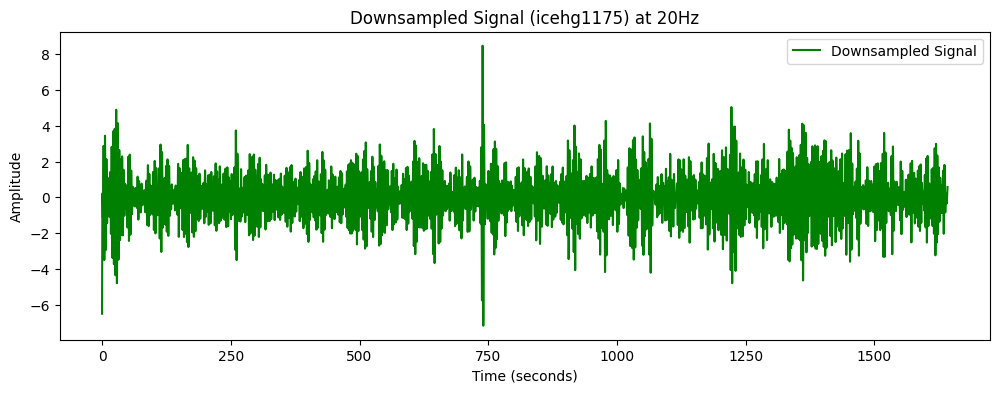

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Select the downsampled signal
downsampled_signal = downsampled_data[1]['signal']
record_name = downsampled_data[1]['record_name']

# Create time axis assuming uniform sampling
downsampled_fs = 20  # The new sampling frequency
downsampled_time_axis = np.arange(len(downsampled_signal)) / downsampled_fs

# Plot the downsampled signal
plt.figure(figsize=(12, 4))
plt.plot(downsampled_time_axis, downsampled_signal, label="Downsampled Signal", color='g')
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title(f"Downsampled Signal ({record_name}) at 20Hz")
plt.legend()
plt.show()


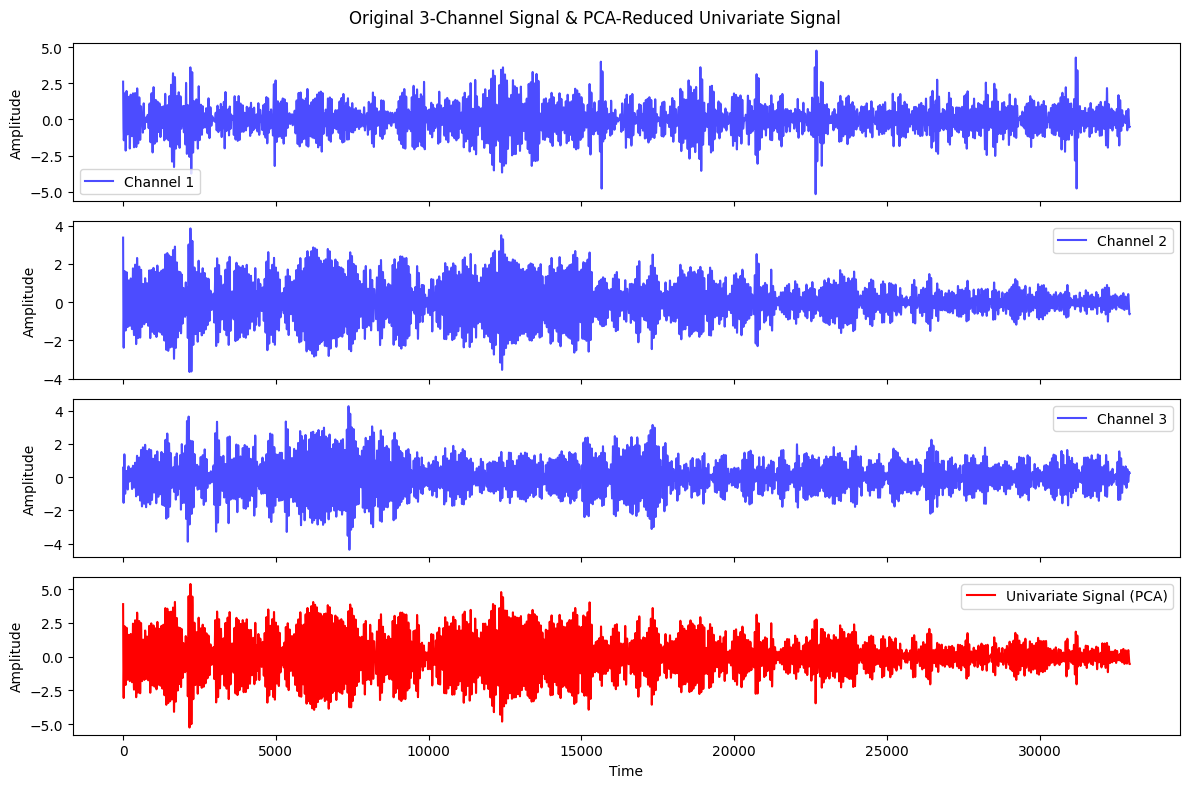

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Load dataset
data_path = os.path.join(univariate_data_path, dataset + "_univariate.npy")
data = np.load(data_path, allow_pickle=True)

# Select a random instance for visualization
random_instance = random.choice(data)
univariate_signal = random_instance['signal']  # Univariate after PCA

# Load the original dataset before PCA
original_data_path = os.path.join(processed_data_path, dataset + "_preprocessed.npy")
original_data = np.load(original_data_path, allow_pickle=True)

# Find the corresponding original signal
record_name = random_instance['record_name']
original_instance = next(entry for entry in original_data if entry['record_name'] == record_name)
original_multivariate_signal = original_instance['signal']  # Shape: (sequence_length, num_channels)

num_channels = original_multivariate_signal.shape[1]  

# Create subplots (num_channels + 1 to include the univariate signal)
fig, axs = plt.subplots(num_channels + 1, 1, figsize=(12, 2 * (num_channels + 1)), sharex=True)

time_axis = np.arange(original_multivariate_signal.shape[0])

# Plot all channels dynamically
for i in range(num_channels):
    axs[i].plot(time_axis, original_multivariate_signal[:, i], label=f'Channel {i+1}', color='b', alpha=0.7)
    axs[i].legend()
    axs[i].set_ylabel("Amplitude")

# Plot the univariate signal in a distinct color
axs[num_channels].plot(time_axis, univariate_signal, label="Univariate Signal (PCA)", color='r')
axs[num_channels].legend()
axs[num_channels].set_ylabel("Amplitude")
axs[num_channels].set_xlabel("Time")

fig.suptitle(f"Original {num_channels}-Channel Signal & PCA-Reduced Univariate Signal")
plt.tight_layout()
plt.show()
